### [Tache0][4.5points] Proposer du code pour filtrer le data frame

##### Importation des bibliothèques

In [ ]:
%load_ext autoreload
%autoreload 2


import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../scripts')
from data_preprocessing import detect_and_filter_columns 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### Chargement du dataset

In [110]:
# Je charge le dataset en ne prenant que les 1000 premières lignes afin de tester les fonctions
path = "../data/dataset.csv" # Chemin du dataset 
df = pd.read_csv(path, nrows=1000, sep=',',encoding="utf-8")

In [ ]:
# Utilisation de la fonction detect_and_filter_columns
df = detect_and_filter_columns(df, max_categories=10)

display(df.info())
# Le DataFrame contient 1 000 lignes, 145 colonnes avec plusieurs types de données (catégorie, float32, float64, int16, int32) et 546 Ko de mémoire.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 145 entries, Unnamed: 0 to owner
dtypes: category(8), float32(131), float64(1), int16(1), int32(4)
memory usage: 546.7 KB


None

#### [Tache1.0][5pts] Repérer et nettoyer le jeu de données des valeurs problématiques

##### Importation des bibliothèques

In [112]:
%load_ext autoreload
%autoreload 2


import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../scripts')
from preprocess import clear_missing_data, percent_data, visualize, delete_data, impute_data, compare_dist


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### Chargement du dataset

In [113]:
# Je charge le dataset en ne prenant que les 1000 premières lignes afin de tester les fonctions
path = "../data/dataset.csv" # Chemin du dataset 
df = pd.read_csv(path, nrows=1000, sep=',',encoding="utf-8")

In [114]:
# Je vérifie que le dataset a bien été chargé ainsi que sa taille
df.shape

(1000, 207)

##### Suppresion des colonnes vides

In [115]:
# Je supprime les colonnes avec données manquantes
df = clear_missing_data(df)

Nombre de colonnes vides (100% de valeurs manquantes) : 73


In [116]:
# Je vérifie le nombre de colonnes supprimées
df.shape

(1000, 134)

##### Suppresion des colonnes avec 70% de données manquantes

In [117]:
# Je vérifie le pourcentage de colonnes avec plus de 70% de données manquantes
columns_to_drop_details, threshold = percent_data(df, threshold=70)

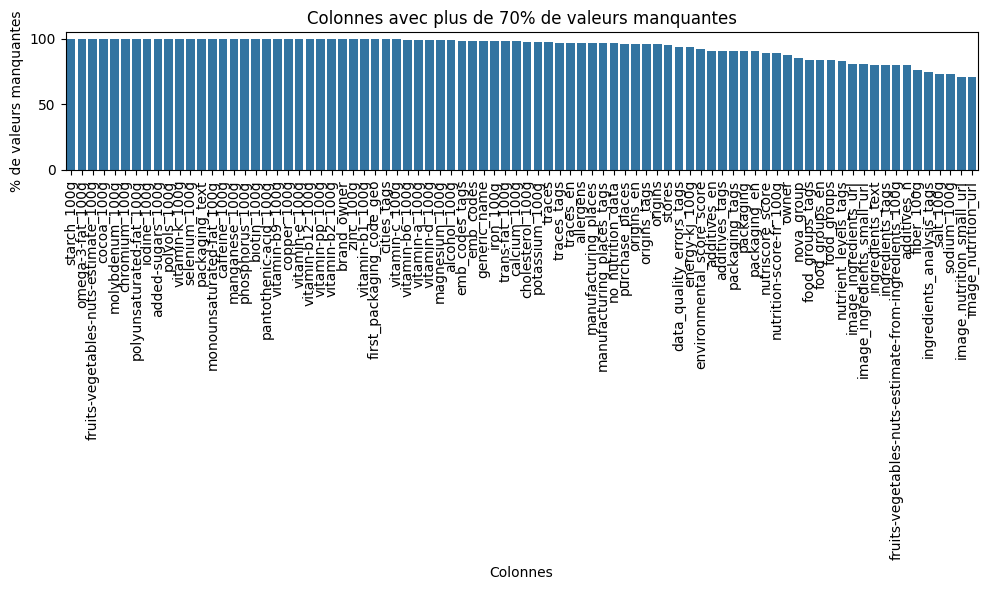

In [118]:
# je visualise le nombre de colonnes à supprimer
df = visualize(df, columns_to_drop_details, threshold)


In [119]:
# je verifie le nombre de colonnes avant la suppression
df.shape

(1000, 134)

In [120]:
# je compte le nombre de colonnes à supprimer
count_columns_to_drop = len(columns_to_drop_details)
print(count_columns_to_drop)

84


In [121]:
# je supprime les colonnes avec plus de 70% de données manquantes
df = delete_data(df, columns_to_drop_details.index)

In [122]:
# je verifie le nombre de colonnes après la suppression
df.shape


(1000, 50)

##### Suppression des colonnes non pertinentes

In [123]:
#je verifie le nombre de colonnes total avant modification
df.shape

(1000, 50)

In [124]:
# je sélectionne les colonnes avec des données non pertinentes
columns_to_drop = [
    'Unnamed: 0', 'code', 'url', 'creator', 
    'created_t', 'created_datetime', 
    'last_modified_t', 'last_modified_datetime', 
    'last_modified_by', 'last_updated_t',	'last_updated_datetime'
]

In [125]:
# je supprime les colonnes non pertinentes
df = delete_data(df,columns_to_drop)

In [126]:
# je verifie le nombre de colonnes total après modification
df.shape

(1000, 39)

#### Imputation des variables numériques

In [127]:
 # je verifie les colonnes numériques avant imputation 
df

,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_en,labels,labels_tags,labels_en,...,main_category_en,image_url,image_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g
0,Limonade artisanale a la rose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tablette Tanzanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chocolate n 3,80 g,Jeff de Bruges,jeff-de-bruges,NaN,NaN,NaN,"Point Vert, Fabriqué en France","en:green-dot,en:made-in-france","Green Dot,Made in France",...,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,2415.0,44.0,28.0,30.00,27.0,7.10
3,KOJI MISO PASTE,300g,UMAMI,umami,"Supplements, Vegtable","en:supplements,en:vegtable","Supplements,Vegtable","No gluten, Vegetarian, No artificial flavors, ...","en:no-gluten,en:organic,en:vegetarian,en:eu-or...","No gluten,Organic,Vegetarian,EU Organic,No art...",...,Vegtable,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,209.0,874.0,6.0,1.0,21.40,11.1,11.20
4,Paleta gran reserva - Sierra nevada-,750ml,AdvoCare,advocare,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",NaN,NaN,NaN,...,Beverages,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Herbal Tea Cinnamon,NaN,NaN,NaN,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...",NaN,NaN,NaN,...,Tea bags,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,0.0,0.0,0.0,0.0,60.00,0.0,0.00
996,"Herbal Tea, Hibiscus",NaN,Lagg's,lagg-s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,267.0,1117.0,0.0,NaN,60.00,NaN,66.67
997,Apple & Cinnamon Tea,NaN,Lagg's,lagg-s,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...",NaN,NaN,NaN,...,Teas,NaN,NaN,0.0,0.0,0.0,NaN,60.00,NaN,66.67
998,"Lagg's, green tea",NaN,Lagg's,lagg-s,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...",NaN,NaN,NaN,...,Tea bags,NaN,NaN,0.0,0.0,0.0,NaN,2.67,NaN,0.00


In [128]:
df

,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_en,labels,labels_tags,labels_en,...,main_category_en,image_url,image_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g
0,Limonade artisanale a la rose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tablette Tanzanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chocolate n 3,80 g,Jeff de Bruges,jeff-de-bruges,NaN,NaN,NaN,"Point Vert, Fabriqué en France","en:green-dot,en:made-in-france","Green Dot,Made in France",...,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,2415.0,44.0,28.0,30.00,27.0,7.10
3,KOJI MISO PASTE,300g,UMAMI,umami,"Supplements, Vegtable","en:supplements,en:vegtable","Supplements,Vegtable","No gluten, Vegetarian, No artificial flavors, ...","en:no-gluten,en:organic,en:vegetarian,en:eu-or...","No gluten,Organic,Vegetarian,EU Organic,No art...",...,Vegtable,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,209.0,874.0,6.0,1.0,21.40,11.1,11.20
4,Paleta gran reserva - Sierra nevada-,750ml,AdvoCare,advocare,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",NaN,NaN,NaN,...,Beverages,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Herbal Tea Cinnamon,NaN,NaN,NaN,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...",NaN,NaN,NaN,...,Tea bags,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,0.0,0.0,0.0,0.0,60.00,0.0,0.00
996,"Herbal Tea, Hibiscus",NaN,Lagg's,lagg-s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,267.0,1117.0,0.0,NaN,60.00,NaN,66.67
997,Apple & Cinnamon Tea,NaN,Lagg's,lagg-s,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...",NaN,NaN,NaN,...,Teas,NaN,NaN,0.0,0.0,0.0,NaN,60.00,NaN,66.67
998,"Lagg's, green tea",NaN,Lagg's,lagg-s,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...",NaN,NaN,NaN,...,Tea bags,NaN,NaN,0.0,0.0,0.0,NaN,2.67,NaN,0.00


In [129]:
# J'impute les données manquantes

df_original, df_imputed = impute_data(df) 


In [130]:
df_imputed

,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_en,labels,labels_tags,labels_en,...,main_category_en,image_url,image_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g
0,Limonade artisanale a la rose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,379.6,1308.4,19.2,5.1,20.7,9.7,15.1
1,Tablette Tanzanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,379.6,1900.0,14.4,8.2,15.2,9.2,13.2
2,Chocolate n 3,80 g,Jeff de Bruges,jeff-de-bruges,NaN,NaN,NaN,"Point Vert, Fabriqué en France","en:green-dot,en:made-in-france","Green Dot,Made in France",...,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,591.8,2415.0,44.0,28.0,30.0,27.0,7.1
3,KOJI MISO PASTE,300g,UMAMI,umami,"Supplements, Vegtable","en:supplements,en:vegtable","Supplements,Vegtable","No gluten, Vegetarian, No artificial flavors, ...","en:no-gluten,en:organic,en:vegetarian,en:eu-or...","No gluten,Organic,Vegetarian,EU Organic,No art...",...,Vegtable,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,209.0,874.0,6.0,1.0,21.4,11.1,11.2
4,Paleta gran reserva - Sierra nevada-,750ml,AdvoCare,advocare,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",NaN,NaN,NaN,...,Beverages,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,341.9,1430.0,19.5,7.0,10.9,3.3,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Herbal Tea Cinnamon,NaN,NaN,NaN,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...",NaN,NaN,NaN,...,Tea bags,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,0.0,0.0,0.0,0.0,60.0,0.0,0.0
996,"Herbal Tea, Hibiscus",NaN,Lagg's,lagg-s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,267.0,1117.0,0.0,0.1,60.0,0.7,66.7
997,Apple & Cinnamon Tea,NaN,Lagg's,lagg-s,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...",NaN,NaN,NaN,...,Teas,NaN,NaN,0.0,0.0,0.0,0.0,60.0,0.7,66.7
998,"Lagg's, green tea",NaN,Lagg's,lagg-s,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...",NaN,NaN,NaN,...,Tea bags,NaN,NaN,0.0,0.0,0.0,0.0,2.7,1.2,0.0


In [131]:
# Je vérifie les colonnes numériques après imputation  
df_imputed

,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_en,labels,labels_tags,labels_en,...,main_category_en,image_url,image_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g
0,Limonade artisanale a la rose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,379.6,1308.4,19.2,5.1,20.7,9.7,15.1
1,Tablette Tanzanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,379.6,1900.0,14.4,8.2,15.2,9.2,13.2
2,Chocolate n 3,80 g,Jeff de Bruges,jeff-de-bruges,NaN,NaN,NaN,"Point Vert, Fabriqué en France","en:green-dot,en:made-in-france","Green Dot,Made in France",...,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,591.8,2415.0,44.0,28.0,30.0,27.0,7.1
3,KOJI MISO PASTE,300g,UMAMI,umami,"Supplements, Vegtable","en:supplements,en:vegtable","Supplements,Vegtable","No gluten, Vegetarian, No artificial flavors, ...","en:no-gluten,en:organic,en:vegetarian,en:eu-or...","No gluten,Organic,Vegetarian,EU Organic,No art...",...,Vegtable,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,209.0,874.0,6.0,1.0,21.4,11.1,11.2
4,Paleta gran reserva - Sierra nevada-,750ml,AdvoCare,advocare,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",NaN,NaN,NaN,...,Beverages,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,341.9,1430.0,19.5,7.0,10.9,3.3,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Herbal Tea Cinnamon,NaN,NaN,NaN,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...",NaN,NaN,NaN,...,Tea bags,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,0.0,0.0,0.0,0.0,60.0,0.0,0.0
996,"Herbal Tea, Hibiscus",NaN,Lagg's,lagg-s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,267.0,1117.0,0.0,0.1,60.0,0.7,66.7
997,Apple & Cinnamon Tea,NaN,Lagg's,lagg-s,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...",NaN,NaN,NaN,...,Teas,NaN,NaN,0.0,0.0,0.0,0.0,60.0,0.7,66.7
998,"Lagg's, green tea",NaN,Lagg's,lagg-s,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...",NaN,NaN,NaN,...,Tea bags,NaN,NaN,0.0,0.0,0.0,0.0,2.7,1.2,0.0


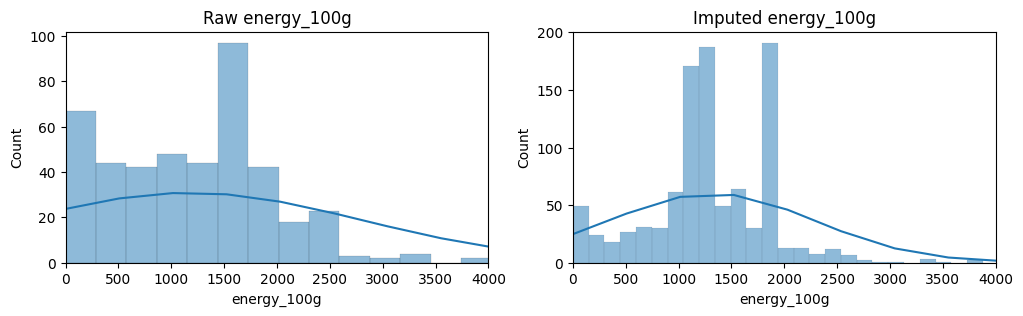

In [132]:
# je compare les données avant et après imputation
feature = "energy_100g"
fig = compare_dist(df_original, df_imputed, feature)  
plt.show()